# LOADING DATA FROM DATASETS

In [124]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
data = pd.read_csv('8-sa-government-enrolments-by-school.csv')

# Print the first few rows of the loaded data
print(data.head()) 


   School_Number                       School_Name        School_Type  \
0            102           East Murray Area School  Primary Education   
1            104  Coromandel Valley Primary School  Primary Education   
2            106         Cowandilla Primary School  Primary Education   
3            107            Crafers Primary School  Primary Education   
4            111      Crystal Brook Primary School  Primary Education   

              Suburb  Post_Code   Latitude   Longitude   2009   2010   2011  \
0           Mindarie       5309 -34.739441  140.136181   55.6   47.7   42.8   
1  Coromandel Valley       5051 -35.033562  138.626758  425.0  423.0  456.0   
2         Cowandilla       5033 -34.934160  138.559877  274.0  289.0  297.0   
3            Crafers       5152 -34.993387  138.713480  270.0  284.0  287.0   
4      Crystal Brook       5523 -33.352948  138.213543  192.0  169.0  155.0   

   ...   2014   2015   2016   2017   2018   2019   2020   2021   2022   2023  
0  ... 

# HANDLING MISSING VALUES 

In [125]:
import pandas as pd
import numpy as np

# 1. BASIC MISSING VALUES HANDLING
def handle_missing_values(df):
    """Quick missing value fixes"""
    df_clean = df.copy()
    
    # Fill numeric columns with median
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Fill text columns with mode
    text_cols = df_clean.select_dtypes(include=['object']).columns
    for col in text_cols:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    
    return df_clean

# 2. SIMPLE OUTLIER DETECTION & REMOVAL
def remove_outliers(df, columns):
    """Remove outliers using IQR method"""
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# 3. FORMAT STANDARDIZATION
def standardize_formats(df):
    """Fix common format issues"""
    df_clean = df.copy()
    
    # Clean text columns
    text_cols = df_clean.select_dtypes(include=['object']).columns
    for col in text_cols:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.upper()
    
    # Convert string numbers to numeric
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            try:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
            except:
                pass
    
    return df_clean

# 4. QUICK DATA OVERVIEW
def data_overview(df):
    """Get quick data quality summary"""
    print(f"Shape: {df.shape}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Data types:\n{df.dtypes.value_counts()}")

# 5. ALL-IN-ONE CLEANING FUNCTION
def quick_clean(df):
    """Complete basic cleaning in one function"""
    print("Starting data cleaning...")
    
    # Remove duplicates
    df_clean = df.drop_duplicates()
    print(f"Removed {len(df) - len(df_clean)} duplicates")
    
    # Handle missing values
    df_clean = handle_missing_values(df_clean)
    print("Missing values handled")
    
    # Standardize formats
    df_clean = standardize_formats(df_clean)
    print("Formats standardized")
    
    # Remove negative values from population data
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if any(word in col.upper() for word in ['AGE', 'CLASS', 'POPULATION']):
            df_clean[col] = df_clean[col].clip(lower=0)
    
    print("Cleaning complete!")
    return df_clean

# USAGE EXAMPLES:
if __name__ == "__main__":
    # For your demographic data:
    
    # Quick clean everything
    # cleaned_data = quick_clean(data)
    
    # Or step by step:
    # data_overview(data)  # Check original data
    # cleaned_data = handle_missing_values(data)
    # cleaned_data = standardize_formats(cleaned_data)
    # cleaned_data = remove_outliers(cleaned_data, ['CLASS_TEN_AGE15', 'CLASS_TEN_AGE_UPPER15'])
    
    print("Ready to use with your 'data' DataFrame!")



Ready to use with your 'data' DataFrame!


# QUICK ENCODING
Encoding: Convert (information or an instruction) into a particular form.


In [126]:
# School Data Encoding Examples - Pandas Only (No sklearn needed)
import pandas as pd
import numpy as np

# Assuming your data is already loaded as 'data'
data = pd.read_csv('8-sa-government-enrolments-by-school.csv')

# 1. LABEL ENCODING for categorical variables (using pandas only)
def apply_label_encoding(df):
    """Apply label encoding to categorical columns using pandas"""
    df_encoded = df.copy()
    
    # Create mapping dictionaries for later reference
    mappings = {}
    
    # Label encode School_Type
    unique_types = df_encoded['School_Type'].unique()
    type_mapping = {val: idx for idx, val in enumerate(unique_types)}
    df_encoded['School_Type_Encoded'] = df_encoded['School_Type'].map(type_mapping)
    mappings['school_type'] = type_mapping
    
    # Label encode School_Name
    unique_names = df_encoded['School_Name'].unique()
    name_mapping = {val: idx for idx, val in enumerate(unique_names)}
    df_encoded['School_Name_Encoded'] = df_encoded['School_Name'].map(name_mapping)
    mappings['school_name'] = name_mapping
    
    # Label encode Suburb
    unique_suburbs = df_encoded['Suburb'].unique()
    suburb_mapping = {val: idx for idx, val in enumerate(unique_suburbs)}
    df_encoded['Suburb_Encoded'] = df_encoded['Suburb'].map(suburb_mapping)
    mappings['suburb'] = suburb_mapping
    
    return df_encoded, mappings

# 2. ONE-HOT ENCODING for categorical variables
def apply_onehot_encoding(df):
    """Apply one-hot encoding to categorical columns"""
    df_encoded = df.copy()
    
    # One-hot encode School_Type
    school_type_encoded = pd.get_dummies(df_encoded['School_Type'], prefix='SchoolType')
    df_encoded = pd.concat([df_encoded, school_type_encoded], axis=1)
    
    # One-hot encode Suburb (be careful - might create many columns)
    suburb_encoded = pd.get_dummies(df_encoded['Suburb'], prefix='Suburb')
    df_encoded = pd.concat([df_encoded, suburb_encoded], axis=1)
    
    return df_encoded

# 3. STANDARDIZE NUMERICAL FEATURES (using pandas/numpy only)
def standardize_numerical_features(df):
    """Standardize numerical columns like coordinates and enrollment data"""
    df_scaled = df.copy()
    
    # Identify numerical columns (enrollment years, coordinates)
    numerical_cols = ['Latitude', 'Longitude'] + [col for col in df.columns if col.isdigit()]
    
    # Manual standardization: (x - mean) / std
    scaling_params = {}
    for col in numerical_cols:
        if col in df_scaled.columns:
            mean_val = df_scaled[col].mean()
            std_val = df_scaled[col].std()
            df_scaled[col] = (df_scaled[col] - mean_val) / std_val
            scaling_params[col] = {'mean': mean_val, 'std': std_val}
    
    return df_scaled, scaling_params

# 4. COMPREHENSIVE ENCODING PIPELINE
def encode_school_data(df):
    """Complete encoding pipeline for school data"""
    
    # Make a copy to avoid modifying original data
    df_processed = df.copy()
    
    # Handle missing values first
    enrollment_cols = [col for col in df.columns if col.isdigit()]
    df_processed[enrollment_cols] = df_processed[enrollment_cols].fillna(0)
    
    # Apply label encoding
    df_processed, label_mappings = apply_label_encoding(df_processed)
    
    # Standardize numerical features
    df_processed, scaling_params = standardize_numerical_features(df_processed)
    
    # Create enrollment trend features
    if enrollment_cols:
        df_processed['Enrollment_Mean'] = df_processed[enrollment_cols].mean(axis=1)
        df_processed['Enrollment_Std'] = df_processed[enrollment_cols].std(axis=1)
        if len(enrollment_cols) > 1:
            df_processed['Enrollment_Trend'] = df_processed[enrollment_cols[-1]] - df_processed[enrollment_cols[0]]
    
    return df_processed, label_mappings, scaling_params

# 5. USAGE EXAMPLES
if __name__ == "__main__":
    # Apply the encoding (replace 'data' with your DataFrame variable name)
    # encoded_data, mappings, scaling_params = encode_school_data(data)
    
    # Example: Just label encoding
    # encoded_data, label_mappings = apply_label_encoding(data)
    # print("Label encoded data shape:", encoded_data.shape)
    
    # Example: Just one-hot encoding  
    # onehot_data = apply_onehot_encoding(data)
    # print("One-hot encoded data shape:", onehot_data.shape)
    
    # Example: Just standardization
    # scaled_data, scaling_params = standardize_numerical_features(data)
    # print("Standardized data shape:", scaled_data.shape)
    
    print("Encoding functions ready to use!")
    
# 6. SPECIFIC ENCODING FOR MACHINE LEARNING
def prepare_for_ml(df, target_column=None):
    """Prepare data specifically for machine learning"""
    
    # Select features for ML
    feature_cols = ['School_Number', 'Latitude', 'Longitude'] + \
                   [col for col in df.columns if col.isdigit()]
    
    X = df[feature_cols].copy()
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Encode categorical if any
    categorical_cols = X.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            unique_vals = X[col].unique()
            mapping = {val: idx for idx, val in enumerate(unique_vals)}
            X[col + '_encoded'] = X[col].map(mapping)
            X = X.drop(col, axis=1)
    
    # Scale features manually
    scaling_info = {}
    for col in X.columns:
        mean_val = X[col].mean()
        std_val = X[col].std()
        X[col] = (X[col] - mean_val) / std_val
        scaling_info[col] = {'mean': mean_val, 'std': std_val}
    
    y = None
    if target_column and target_column in df.columns:
        y = df[target_column]
    
    return X, y, scaling_info

Encoding functions ready to use!


# MEAN FOR ALL NUMERIC COLUMNS

In [127]:
# Simple code for finding mean - FIXED VERSION

# 1. Mean of ONLY numeric columns (this will work!)
data.select_dtypes(include='number').mean()

# 2. Mean of a specific numeric column
data['2023'].mean()  # Mean enrollment for 2023

# 3. Mean of coordinates
data[['Latitude', 'Longitude']].mean()

# 4. Mean for enrollment years only
enrollment_cols = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', 
                   '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
data[enrollment_cols].mean()

# 5. Mean by row (average enrollment per school across years)
data[enrollment_cols].mean(axis=1)

# 6. Print specific means
print("Mean Latitude:", data['Latitude'].mean())
print("Mean Longitude:", data['Longitude'].mean()) 
print("Mean 2023 Enrollment:", data['2023'].mean())

# 7. Store means in variables
mean_2023 = data['2023'].mean()
mean_lat = data['Latitude'].mean()
mean_lon = data['Longitude'].mean()

print(f"Average enrollment in 2023: {mean_2023:.1f} students")
print(f"Average coordinates: ({mean_lat:.6f}, {mean_lon:.6f})")

# 8. Get all numeric means at once
numeric_means = data.select_dtypes(include='number').mean()
print("\nAll numeric column means:")
print(numeric_means)

Mean Latitude: -34.64872241301273
Mean Longitude: 138.54939212164075
Mean 2023 Enrollment: 337.68779527559053
Average enrollment in 2023: 337.7 students
Average coordinates: (-34.648722, 138.549392)

All numeric column means:
School_Number     820.842999
Post_Code        5171.879774
Latitude          -34.648722
Longitude         138.549392
2009              281.569558
2010              286.441796
2011              298.371043
2012              301.057324
2013              318.652471
2014              317.761377
2015              323.917308
2016              330.937403
2017              336.973242
2018              340.807241
2019              345.829412
2020              345.451961
2021              341.493504
2022              338.556299
2023              337.687795
dtype: float64


# MEDIAN FOR ALL NUMERIC VALUES



In [128]:
#MEDIAN FOR ALL NUMERCIC VALUES

import pandas as pd

# Load the CSV file
data = pd.read_csv('8-sa-government-enrolments-by-school.csv')

# Print median of all numeric columns
print("MEDIAN FOR ALL NUMERIC VALUES\n")
print(data.median(numeric_only=True))

#// Print median of specific columns


MEDIAN FOR ALL NUMERIC VALUES

School_Number     776.000000
Post_Code        5159.000000
Latitude          -34.857424
Longitude         138.621393
2009              215.300000
2010              222.000000
2011              232.000000
2012              230.000000
2013              242.500000
2014              243.200000
2015              248.400000
2016              261.300000
2017              262.700000
2018              264.000000
2019              269.500000
2020              269.500000
2021              260.000000
2022              229.000000
2023              229.000000
dtype: float64


# MODE FOR EACH YEAR


In [129]:
import pandas as pd

data = pd.read_csv('8-sa-government-enrolments-by-school.csv') 

numeric_columns = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'
] # Replace with the actual numeric column names in your dataset 
modes = []
for column in numeric_columns:  
    mode = data[column].mode()[0]  # Find the mode of each column
    modes.append(mode)

print("The modes for each numeric column are:\n", modes)

The modes for each numeric column are:
 [37.0, 35.0, 164.0, 179.0, 31.0, 20.0, 27.0, 54.0, 29.0, 26.0, 22.0, 401.0, 11.0, 24.0, 33.0]


# STANDARD DEVIATION FOR ALL CLASSES


In [130]:
# STANDARD DEVIATION FOR ALL CLASSES

import pandas as pd

# Load the CSV file
data = pd.read_csv('8-sa-government-enrolments-by-school.csv')

# Select only columns containing '20'
class_columns = data.filter(like='20')

# Calculate standard deviation for those columns
std_class = class_columns.std(numeric_only=True)

# Print the result
print("STANDARD DEVIATION FOR EACH YEAR:\n")
print(std_class)


STANDARD DEVIATION FOR EACH YEAR:

2009    258.283375
2010    263.739258
2011    275.092536
2012    278.677933
2013    292.942258
2014    295.362435
2015    302.278854
2016    307.512116
2017    310.701559
2018    314.016844
2019    318.028861
2020    319.347450
2021    318.327289
2022    358.710210
2023    357.252599
dtype: float64


# HISTOGRAM VISUALIZATION

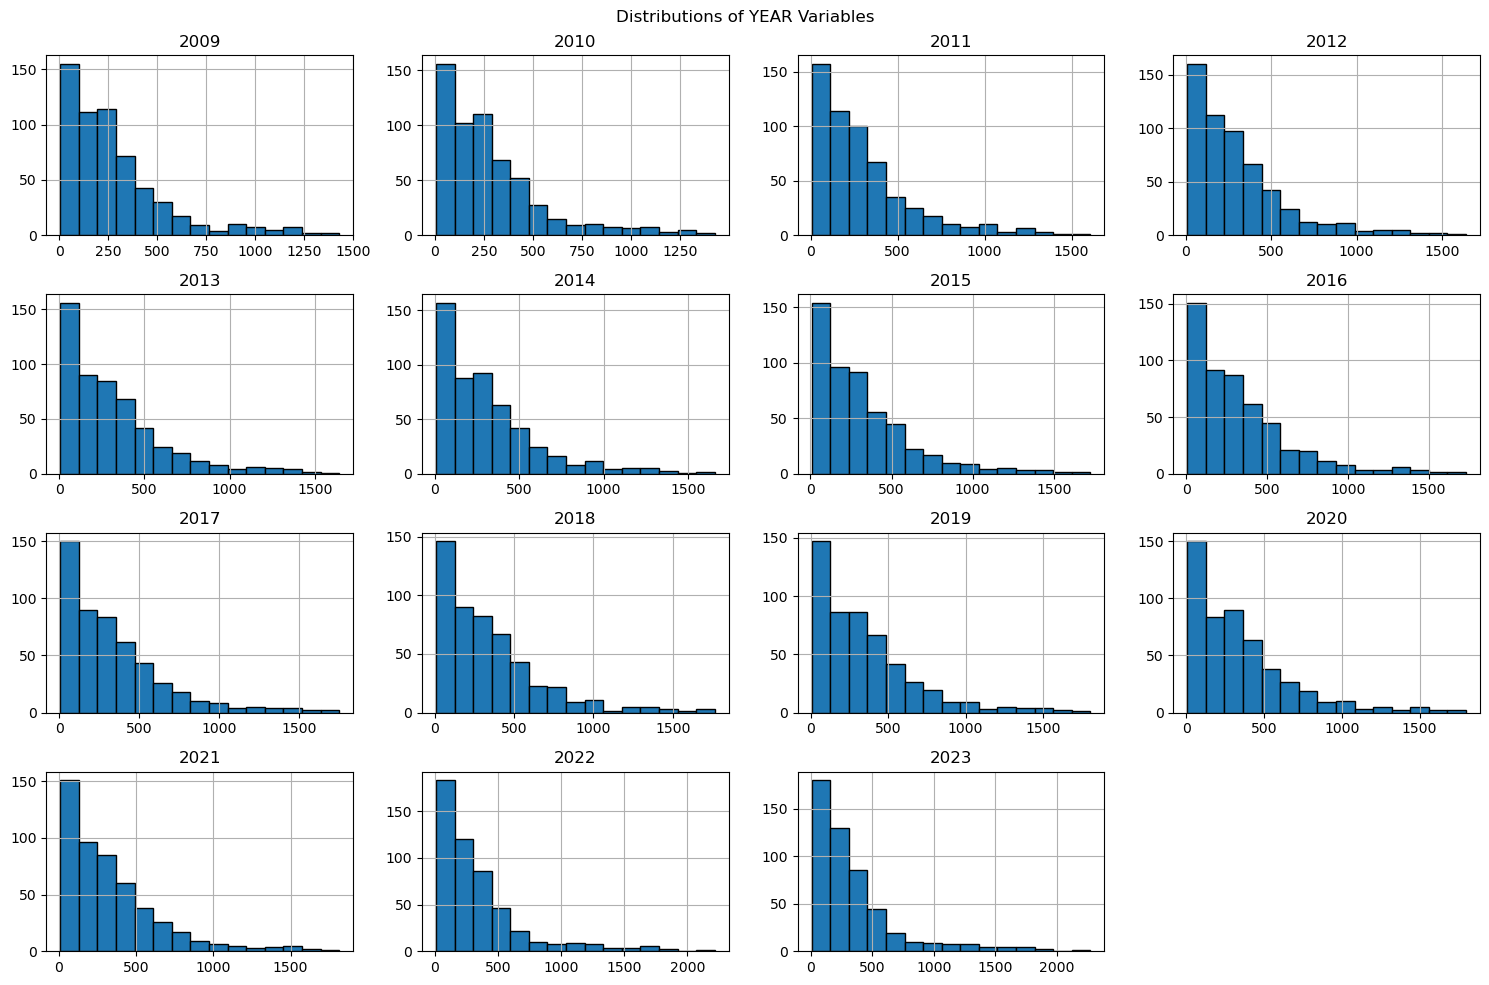

In [ ]:
# visualizing distribution and relationship among year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('8-sa-government-enrolments-by-school.csv')

# Filter related columns
class_cols = data.filter(like='20')

# HISTOGRAM
# Plot distribution of each YEAR column
class_cols.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distributions of YEAR Variables')
plt.tight_layout()
plt.show()

# BOXPLOT VISUALIZATION



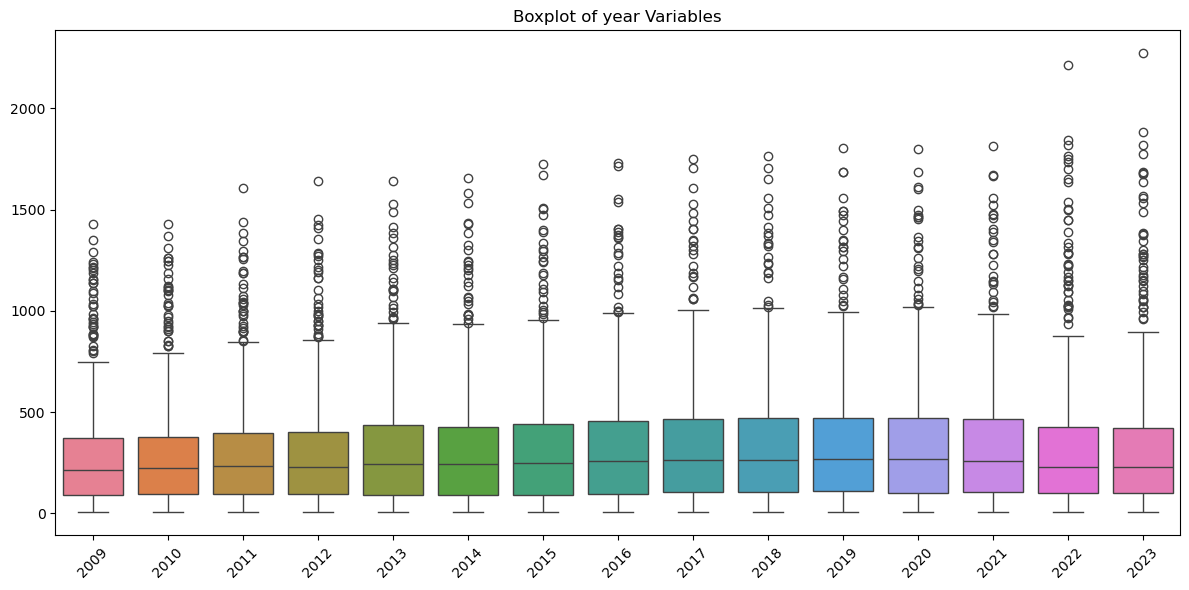

In [132]:
#BOX_PLOT
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the dataset
data = pd.read_csv('8-sa-government-enrolments-by-school.csv')

# Filter class-related columns
class_cols = data.filter(like='20')
#BOX PLOT
plt.figure(figsize=(12, 6))
sns.boxplot(data=class_cols)
plt.title('Boxplot of year Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# TRAIN LINEAR REGRESSION MODEL

Training a regression model involves using a dataset to find the best-fitting mathematical relationship (model) between input features and a continuous numerical output.


In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example dataset
# Replace this with your own dataset loading method
data = {
    'feature1': [5, 7, 8, 12, 14, 15, 18, 21, 24, 28],
    'feature2': [1, 2, 3, 4, 5, 5, 7, 8, 9, 10],
    'target': [15, 18, 21, 30, 35, 40, 45, 50, 55, 60]
}

df = pd.DataFrame(data)

# Split features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split dataset into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Display model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2.4014007838583282
R^2 Score: 0.9929834893093986
Coefficients: [1.34638554 1.7439759 ]
Intercept: 7.262048192771083


# EVALUATION METRICS
# R² Score (Coefficient of Determination)

R-squared (R²) is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variable(s) in the model.

In [134]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9929834893093986


# INCORPORATE INNOVATION
To build, evaluate, and compare three different regression models, then combine them into an ensemble model

Linear Regression → RMSE: 1.55, R²: 0.993
Random Forest → RMSE: 2.36, R²: 0.984
Gradient Boosting → RMSE: 3.54, R²: 0.963
Ensemble Model → RMSE: 2.01, R²: 0.988


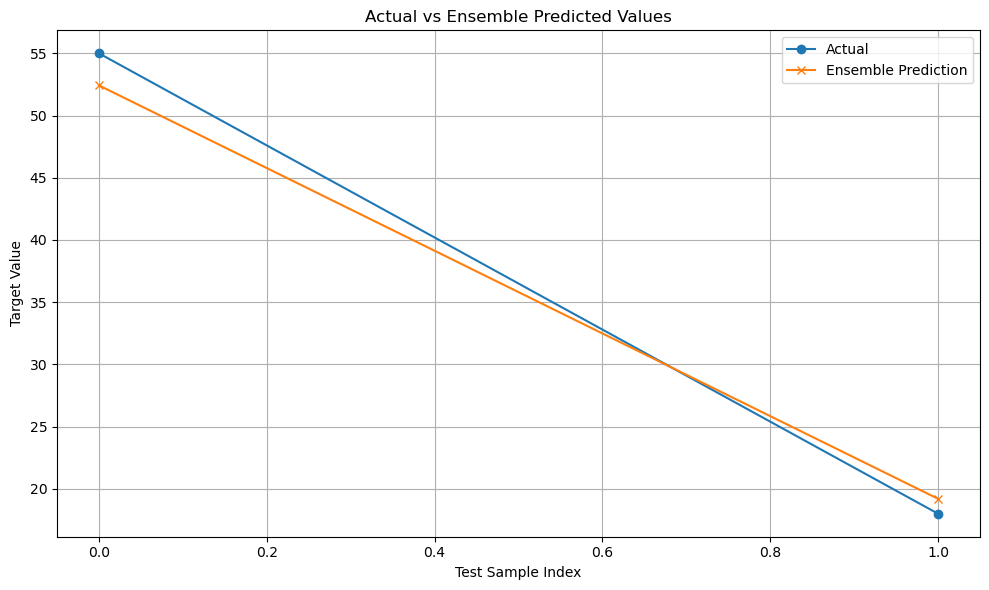

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train individual models
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict with each model
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Custom ensemble: average of all models
ensemble_pred = (lr_pred + rf_pred + gb_pred) / 3

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# Evaluate each
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Gradient Boosting", y_test, gb_pred)
evaluate_model("Ensemble Model", y_test, ensemble_pred)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(ensemble_pred, label="Ensemble Prediction", marker='x')
plt.title("Actual vs Ensemble Predicted Values")
plt.xlabel("Test Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
